In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read the csv file into a pandas DataFrame
season = pd.concat([pd.read_csv(f) for f in glob.glob('nhl_season_data/*.csv')], 
                             ignore_index = True)

season.head(20)

,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1,San Jose Sharks*,28.7,82,53,18,11,117,0.713,251,...,83.22,12,11,12.8,14.1,2720,9.2,2228,0.911,9
1,2,Boston Bruins*,28.4,82,53,19,10,116,0.707,270,...,82.35,8,7,12.5,12.8,2482,10.9,2524,0.925,7
2,3,Detroit Red Wings*,31.2,82,51,21,10,112,0.683,289,...,78.29,6,4,10.0,10.9,2965,9.7,2274,0.894,8
3,4,Washington Capitals*,27.2,82,50,24,8,108,0.659,268,...,80.62,7,11,12.7,11.4,2747,9.8,2418,0.901,2
4,5,New Jersey Devils*,30.3,82,51,27,4,106,0.646,238,...,79.94,12,4,12.9,13.1,2698,8.8,2415,0.914,7
5,6,Chicago Blackhawks*,25.9,82,46,24,12,104,0.634,260,...,80.61,10,6,14.1,15.2,2683,9.7,2344,0.911,6
6,7,Vancouver Canucks*,27.9,82,45,27,10,100,0.610,243,...,81.40,7,5,16.5,16.3,2335,10.4,2392,0.911,10
7,8,Pittsburgh Penguins*,26.6,82,45,28,9,99,0.604,258,...,82.71,7,13,13.6,14.2,2381,10.8,2484,0.906,4
8,9,Philadelphia Flyers*,27.0,82,44,27,11,99,0.604,260,...,82.95,16,1,17.5,14.8,2441,10.7,2668,0.913,3
9,10,Calgary Flames*,28.9,82,46,30,6,98,0.598,251,...,83.38,6,15,15.8,15.6,2643,9.5,2441,0.899,4


In [3]:
# Drop Team column
season_clean = season.drop(columns='Team')

In [4]:
# Determine if any columns have null values that need to be removed
# also helps determine column names
season_clean.isnull().sum()

Rk        0
AvAge     0
GP        0
W         0
L         0
OL        0
PTS       0
PTS%      0
GF        0
GA        0
SOW       0
SOL       0
SRS       0
SOS       0
TG/G      0
EVGF      0
EVGA      0
PP        0
PPO       0
PP%       0
PPA       0
PPOA      0
PK%       0
SH        0
SHA       0
PIM/G     0
oPIM/G    0
S         0
S%        0
SA        0
SV%       0
SO        0
dtype: int64

In [5]:
# Determine max of points column
season_clean['PTS'].describe()

count    301.000000
mean      91.667774
std       13.689263
min       48.000000
25%       82.000000
50%       93.000000
75%      101.000000
max      128.000000
Name: PTS, dtype: float64

In [6]:
# Preprocessing the data
bins = (47, 94.5, 128)
group_names = ['no_playoffs', 'playoffs']
season_clean['PTS'] = pd.cut(season['PTS'], bins = bins, labels = group_names)
season_clean['PTS'].unique()

[playoffs, no_playoffs]
Categories (2, object): [no_playoffs < playoffs]

In [7]:
label_quality = LabelEncoder()

In [8]:
season_clean['PTS'] = label_quality.fit_transform(season_clean['PTS'])

In [9]:
season_clean.head(20)

,Rk,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1,28.7,82,53,18,11,1,0.713,251,199,...,83.22,12,11,12.8,14.1,2720,9.2,2228,0.911,9
1,2,28.4,82,53,19,10,1,0.707,270,190,...,82.35,8,7,12.5,12.8,2482,10.9,2524,0.925,7
2,3,31.2,82,51,21,10,1,0.683,289,240,...,78.29,6,4,10.0,10.9,2965,9.7,2274,0.894,8
3,4,27.2,82,50,24,8,1,0.659,268,240,...,80.62,7,11,12.7,11.4,2747,9.8,2418,0.901,2
4,5,30.3,82,51,27,4,1,0.646,238,207,...,79.94,12,4,12.9,13.1,2698,8.8,2415,0.914,7
5,6,25.9,82,46,24,12,1,0.634,260,209,...,80.61,10,6,14.1,15.2,2683,9.7,2344,0.911,6
6,7,27.9,82,45,27,10,1,0.610,243,213,...,81.40,7,5,16.5,16.3,2335,10.4,2392,0.911,10
7,8,26.6,82,45,28,9,1,0.604,258,233,...,82.71,7,13,13.6,14.2,2381,10.8,2484,0.906,4
8,9,27.0,82,44,27,11,1,0.604,260,232,...,82.95,16,1,17.5,14.8,2441,10.7,2668,0.913,3
9,10,28.9,82,46,30,6,1,0.598,251,246,...,83.38,6,15,15.8,15.6,2643,9.5,2441,0.899,4


In [10]:
season_clean['PTS'].value_counts()

0    164
1    137
Name: PTS, dtype: int64

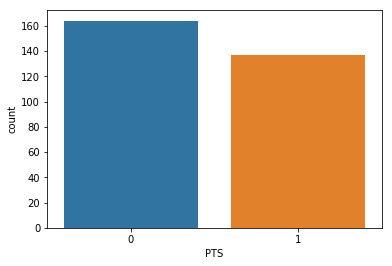

In [11]:
sns.countplot(season_clean['PTS'])

In [12]:
# Assign the data to X and y, x predicts y

X = season_clean.drop('PTS', axis = 1)
y = season_clean["PTS"]


In [13]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Applying standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:10]

array([[-1.17308356e+00,  3.74733692e-01,  0.00000000e+00,
         1.07373504e+00, -9.29119312e-01, -5.59633071e-01,
         1.01886507e+00,  1.42551373e+00, -8.36716338e-01,
        -8.28020971e-01, -1.25502917e+00,  1.40100143e+00,
        -1.94995056e+00,  4.81924576e-01,  2.11564730e+00,
        -7.33334007e-02, -4.44115167e-01, -1.39556293e+00,
         8.53475784e-01, -1.34882964e+00, -1.48717177e+00,
         5.23566145e-01, -5.84267204e-01, -1.22311229e+00,
        -1.18418205e+00, -1.19261328e+00,  3.24645235e-01,
         1.52691512e+00, -6.15440645e-02,  9.03994816e-01,
        -1.11223333e-01],
       [-2.71124576e-01, -1.14895569e+00,  0.00000000e+00,
         8.01575280e-01, -5.08820028e-02, -2.01053362e+00,
         4.53140717e-01,  1.15000687e+00,  1.77543827e-01,
        -1.25212927e+00, -1.69575848e+00,  6.87548142e-01,
        -2.02129021e-01,  1.03771378e+00,  2.26255106e+00,
         1.44056629e+00, -1.57617343e+00, -1.46857445e+00,
        -1.07769525e+00, -1.96

# Random Forest

In [16]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [17]:
pred_rfc[:20]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [18]:
# See how well the model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.95      0.97        40

   micro avg       0.98      0.98      0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91

[[51  0]
 [ 2 38]]


#### confusion matrix = top brackets are mis-labels for non-playoff bound teams, bottom brackets are mis-labels for playoff bound teams.  Therefore, our model is better at predicting playoff bound teams.

In [19]:
# Random Forest Accuracy Score
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.978021978021978

## SVM (Support Vector Machine) Classifier

In [20]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [21]:
# See how well the model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.97      0.93      0.95        40

   micro avg       0.96      0.96      0.96        91
   macro avg       0.96      0.95      0.96        91
weighted avg       0.96      0.96      0.96        91

[[50  1]
 [ 3 37]]


#### SVM works better on smaller numbers, random forest does better with binned numbers, SVM is fastest and easiest to apply with mass data.  Difference between the two will eventually go away with mulitple runs

In [22]:
# SVM Accuracy Score
svm = accuracy_score(y_test, pred_clf)
svm

0.9560439560439561

## Neural Network

In [23]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [24]:
# See how well the model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.97      0.97      0.97        40

   micro avg       0.98      0.98      0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91

[[50  1]
 [ 1 39]]


In [25]:
# Neural Network Accuracy Score
nn = accuracy_score(y_test, pred_mlpc)
nn

0.978021978021978

## Linear Regression Model

In [26]:
# Read the csv file into a pandas DataFrame
season = pd.concat([pd.read_csv(f) for f in glob.glob('nhl_season_data/*.csv')], 
                             ignore_index = True)

season.head(20)

,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1,San Jose Sharks*,28.7,82,53,18,11,117,0.713,251,...,83.22,12,11,12.8,14.1,2720,9.2,2228,0.911,9
1,2,Boston Bruins*,28.4,82,53,19,10,116,0.707,270,...,82.35,8,7,12.5,12.8,2482,10.9,2524,0.925,7
2,3,Detroit Red Wings*,31.2,82,51,21,10,112,0.683,289,...,78.29,6,4,10.0,10.9,2965,9.7,2274,0.894,8
3,4,Washington Capitals*,27.2,82,50,24,8,108,0.659,268,...,80.62,7,11,12.7,11.4,2747,9.8,2418,0.901,2
4,5,New Jersey Devils*,30.3,82,51,27,4,106,0.646,238,...,79.94,12,4,12.9,13.1,2698,8.8,2415,0.914,7
5,6,Chicago Blackhawks*,25.9,82,46,24,12,104,0.634,260,...,80.61,10,6,14.1,15.2,2683,9.7,2344,0.911,6
6,7,Vancouver Canucks*,27.9,82,45,27,10,100,0.610,243,...,81.40,7,5,16.5,16.3,2335,10.4,2392,0.911,10
7,8,Pittsburgh Penguins*,26.6,82,45,28,9,99,0.604,258,...,82.71,7,13,13.6,14.2,2381,10.8,2484,0.906,4
8,9,Philadelphia Flyers*,27.0,82,44,27,11,99,0.604,260,...,82.95,16,1,17.5,14.8,2441,10.7,2668,0.913,3
9,10,Calgary Flames*,28.9,82,46,30,6,98,0.598,251,...,83.38,6,15,15.8,15.6,2643,9.5,2441,0.899,4


In [27]:
# Drop Team column
season_clean = season.drop(columns='Team')

In [28]:
# Assign the data to X and y, x predicts y

X = season_clean.drop('PTS', axis = 1)
y = season_clean["PTS"]


In [29]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# Applying standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Create the model using LinearRegression
model = LinearRegression()


In [32]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
pred_lrm = model.predict(X_test)

In [33]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


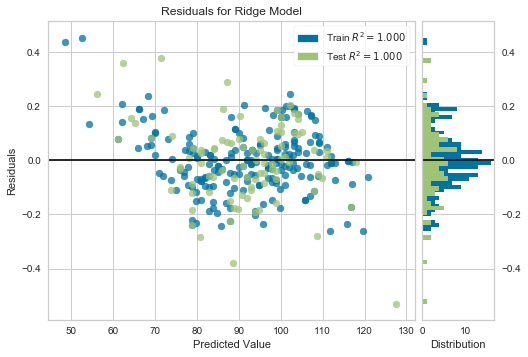

In [34]:
 # Plot the Residuals for Ridge Model
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()                 

In [35]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.1082524412060448e-29, R2: 1.0


In [40]:
Xnew = [[11,82,43,27,12,98,0.598,199,198,8,8,0.07,0.05,4.84,
         150,137,45,252,17.86,53,250,78.8,4,8,9.5,9.9,2180,9.1,2273,0.913,8]]
Xnew = sc.transform(Xnew)
ynew = model.predict(Xnew)
ynew

array([93.27775849])